## K-fold Cross Validation
A given data set is split into K number of folds and each fold is used as a testing set at some point. Cross validation is not a modeling algorithm rather, __it's an alternative to the train_test_split__. 

### Advantages of K-fold cross validation
1. All data value is used for training and testing at a point.
2. Useful for small datasets
3. Improves the accuracy of the model

## Grid search CV
Is used for finding the best hyperparameter values to use for the model. Using the best hyperparameter values improves the accuracy of the model.

## XGBoost 
It's resource consuming (high memory usage) so use when required i.e. If linear regression can model the problem, you don't need to use more complex models.


# Feature Engineering

## Dimensionality reduction
Is a technique used in Machine Learning to reduce dimensions(columns) so only the important ones are left. It is used in both supervised and unsupervised learning techniques.

### Types of Dimensionality reduction
1. __PCA__ - Used for both supervised (labeled data) and unsupervised (i.e. you do not have labeled dataset) learning techniques. 

**Interview question: Why is PCA used for both supervised and unsupervised data?**
Answer: Since PCA only works on the features and on capturing the variance in the features, it can be performed on both sup and unsup learning 

2. __LDA__ - Used only for supervised learning techniques

Advantages:
    
- It reduces computational complexity
- Reduces overfitting by taking care of multicolinearity
- Helps in visualizing by reducing the number of high dimensions

PCA - Principal Component Analysis - You have data on x and y axis -> Apply PCA: New set of axes are achieved denoted as PC1 and PC2 -> Data around PC2 projected along PC1 to ensure no variance is lost.

The number of principal compinents generated is either equal to or less than the number of features whuch were perviously present.

__The generated principal components have different variance values such that the first principal component, PC1, has the highest variance and that it represents the direction of max variance  as well.__

The generated PC components are always arranged in the decending manner  in the output. E.g. if you have a dataset with 10 features, you will have <= 10 Principal Components (PC) so the output will be:

output: PC1, PC2, PC3, PC4, PC5...PC10

PC1 - will have the highest variance, PC2 - second  highest variance....PC10 - lowest variance

The sum of all principal components will equal 1.

The Principal Components are orthogonal to each other i.e. independent

PCA performs well in a normalized dataset

PCA only applies to the independent variables and not the dependent/tarhet hence the reason why it can be used for supervised and unsupervised learning

The principal components in PCA aare created by linear combination of original variables (Calculated with cincepts like eigen values)

Data will be in numeric format. Categorical data need to be one hot encoded

In [1]:
# import iris inbuild dataset
from sklearn import datasets

iris = datasets.load_iris()

# the dataset is in dataframe format so we can assign the values to X(Independent variable) and y(target/dependent variable)
X = iris.data
y = iris.target

In [2]:
# Split the dataset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=21)

## 2. Normalize the data
All the features in the dataset have numeric values so we need to normlize it

In [3]:
# 1. import StandardScaler for normalizing data
from sklearn.preprocessing import StandardScaler

# 2. initialize
sc = StandardScaler()

# 3. transform the train data
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [4]:
# 4. import PCA from sklearn
from sklearn.decomposition import PCA

# 5. initialize PCA
pca = PCA()

In [5]:
# Apply pca
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

In [6]:
# To see the variance values of the PC components

print('The variance values of the PC components are:')
print(pca.explained_variance_ratio_)

The variance values of the PC components are:
[0.69489568 0.25830074 0.04239017 0.0044134 ]


Notice that the variance values are arranged in descending order. The PC1 is expressing 69.48% while PC2: 25.83%. Summing PC1 and PC2 will give 95.31 so selecting PC1 and PC2 means you are building the model with 95.31% of data

### The principal components are your new features and formed from all the independent features in your dataset. How it's derived is a 'black box' using vector decomposition

In [7]:
# To select just the 2 pincipal combonents for building the ML  model

pca2 = PCA(n_components=2)

X_train_pca2 = pca2.fit_transform(X_train)
X_test_pca2 = pca2.fit_transform(X_test)

In [8]:
pca2.explained_variance_ratio_

array([0.69489568, 0.25830074])

In [9]:
# Check the number of PCs is 2 i.e new 'manufactured' columns are now 2 (PC1 and PC2)
print(X_train_pca2.shape)
print(X_test_pca2.shape)

(112, 2)
(38, 2)


Even though we are using 2 components, none of the features are lost in real sense unlike when we just drop columns/features

## 3. Build the ML model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()    # n neighbors default value is 5
knn.fit(X_train_pca2, y_train)   # our X train is now represented as principal component

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
y_pred_pca2 = knn.predict(X_test_pca2)

# check for accuracy
from sklearn.metrics import accuracy_score
print('Accuracy of the model prediction using 2 principal components is:', accuracy_score(y_test, y_pred_pca2))

Accuracy of the model prediction using 2 principal components is: 0.868421052631579


Text(0, 0.5, 'Second Principal component')

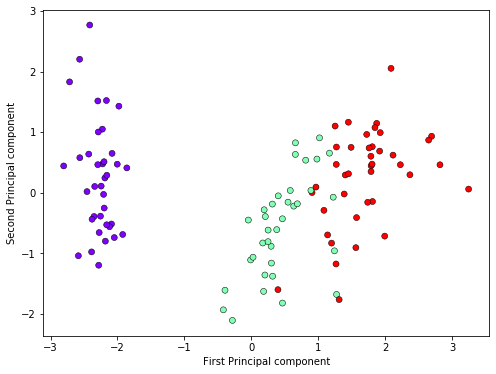

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(X_train_pca2[:,0], X_train_pca2[:,1], c=y_train, cmap='rainbow', linewidth=0.5, edgecolor='black')
# X_train_pca2[:,0] - : selects all the records, 0 is the PC1 and 1 is PC2
# c=y_train means to color based on the y_train values/labels

plt.xlabel('First Principal component')
plt.ylabel('Second Principal component')

# LDA

It's a dimension reduction technique that tries to find a decision boundary around each cluster of a class.
It will project the data points such that the clusters are separated from each other as much as possible.
LDA like PCA also works better when your numerical data are normalizes/standardized.

Miminum # of components required for LDA is 2

Unless LDA, PCA does not care about how the data points cluster.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# specify the number of lda components to use
lda = LDA(n_components=2)

X_train_lda = lda.fit_transform(X_train, y_train)   # LDA takes into account your target as well so you need to pass in both the X and y train
X_test_lda = lda.transform(X_test)   # notice there is no fit but only transform when passing the test data


In [14]:
# You can experiment with the number of lda components to see which gives the best accuracy e.g 2, 3, 4 recall that 2 is the min

In [15]:
knn = KNeighborsClassifier()
knn.fit(X_train_lda, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
# prediction
y_pred_lda = knn.predict(X_test_lda)

# find the accuracy
print('Accuray of model prediction using lda', accuracy_score(y_test, y_pred_lda))

Accuray of model prediction using lda 0.9210526315789473


#### Notice that the accuracy using lda is 6 points higher than the result we got using PCA so 

#### If you are doing supervised learning, USE LDA but if you are doing Unsupervised learning, USE PCA. 

#### LDA cannot be used for unsupervised learning while PCA can

Text(0, 0.5, 'Second LDA component')

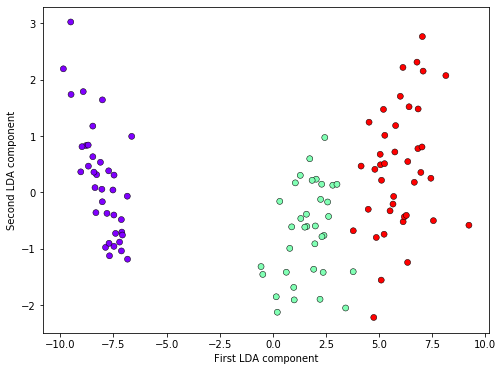

In [19]:
# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=y_train, cmap='rainbow', linewidth=0.5, edgecolor='black')

plt.xlabel('First LDA component')
plt.ylabel('Second LDA component')

# Viz - How to edit the colors

Text(0, 0.5, 'Second LDA component')

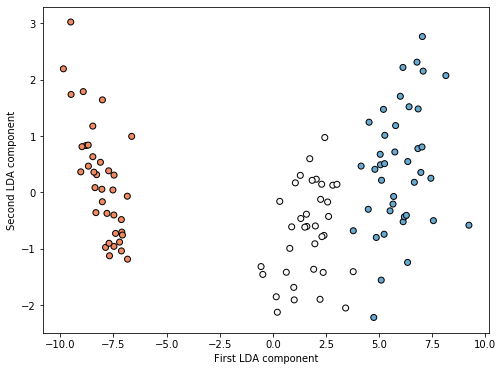

In [22]:
# plot
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_train]
plt.scatter(X_train_lda[:,0], X_train_lda[:,1], c=colors, cmap='rainbow', edgecolor='black')

plt.xlabel('First LDA component')
plt.ylabel('Second LDA component')